In [1]:
import numpy as np
import pandas as pd
from vertica_python import connect
import pyodbc

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [5]:
connect_mssql = pyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                                "Server=10.10.5.143;"
                                "Database=UnionMainDocTWB;"
                                "uid=repp; pwd=LinkedServer123;"
                                "autocommit=True")


transport = pd.read_sql_query("SELECT [rcn]\
                                      ,[OwnerId]\
                                      ,[CurrSize]\
                                      ,[Created]\
                                      ,[InsertDate]\
                                      ,[WBId]\
                                      ,datediff(MINUTE, [Created], InsertDate)\
                                  FROM [UnionMainDocTWB].[dbo].[x5_WayBill]", connect_mssql)
                        
connect_mssql.close()
print(transport.shape)
transport.head()

(994543, 7)


,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1


In [644]:
import datetime
transport['delta_sec'] = (transport['InsertDate'] - transport['Created']).dt.total_seconds().round(1)
# transport['delta_min'] = transport['delta_sec']/60
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time,date_hours,month
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.5,0.108333,"[0, 1]",2020-06-01,00:40:38,2020-06-01 01:00:00,June
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.9,0.065733,"[0, 1]",2020-06-01,00:40:48,2020-06-01 01:00:00,June
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.0,0.150283,"[0, 1]",2020-06-01,00:40:54,2020-06-01 01:00:00,June
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.4,0.072717,"[0, 1]",2020-06-01,00:40:49,2020-06-01 01:00:00,June
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.4,0.056283,"[0, 1]",2020-06-01,00:41:02,2020-06-01 01:00:00,June


In [625]:
transport.describe()

,rcn,CurrSize,,delta_sec,delta_min
count,9.945430e+05,9.945430e+05,994543.000000,994543.000000,994543.000000
mean,2.253580e+09,1.629731e+05,0.488582,28.189114,0.469819
std,1.586390e+08,1.850714e+05,5.908225,353.964143,5.899402
min,1.966277e+09,5.925000e+03,0.000000,0.483000,0.008050
25%,2.117534e+09,3.996200e+04,0.000000,3.123000,0.052050
50%,2.258778e+09,1.340640e+05,0.000000,5.920000,0.098667
75%,2.392230e+09,2.277520e+05,0.000000,9.270000,0.154500
max,2.515607e+09,8.156669e+06,1054.000000,63205.867000,1053.431117


In [643]:
transport.OwnerId.nunique()

31

In [628]:
transport['month'] = transport.InsertDate.dt.month_name()
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time,date_hours,month
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.500,0.108333,"[0, 1]",2020-06-01,00:40:38,2020-06-01 01:00:00,June
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.944,0.065733,"[0, 1]",2020-06-01,00:40:48,2020-06-01 01:00:00,June
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.017,0.150283,"[0, 1]",2020-06-01,00:40:54,2020-06-01 01:00:00,June
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.363,0.072717,"[0, 1]",2020-06-01,00:40:49,2020-06-01 01:00:00,June
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.377,0.056283,"[0, 1]",2020-06-01,00:41:02,2020-06-01 01:00:00,June


In [637]:
transport.groupby('month')['delta_sec'].agg({'count', 'mean', 'median', 'min', 'max'}).reset_index()\
.to_excel('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/describe.xlsx')

In [645]:
transport.groupby('month')['delta_sec'].agg({'count', 'mean', 'median', 'min', 'max'}).reset_index()

,month,min,mean,median,max,count
0,August,0.6,29.754547,5.9,27566.3,163272
1,December,0.8,74.448503,8.4,9315.0,42113
2,July,0.6,8.631874,5.7,38452.0,157474
3,June,0.5,20.043588,5.6,23550.1,131221
4,November,0.7,48.727320,7.0,63205.9,173519
5,October,0.6,26.426401,5.8,40319.2,167672
6,September,0.6,19.883843,5.4,8920.4,159272


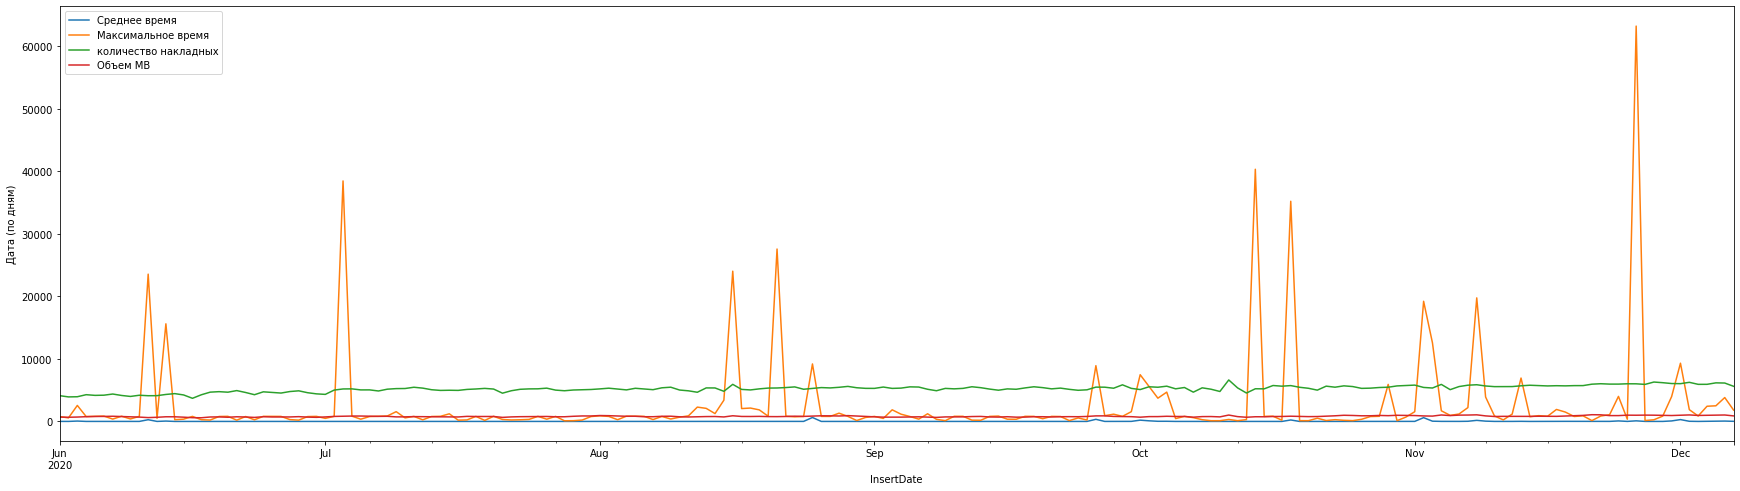

In [55]:
plt.figure(figsize=(30, 8))
transport.set_index('InsertDate')['delta_sec'].resample('d').agg('mean').plot(label = 'Среднее время')
transport.set_index('InsertDate')['delta_sec'].resample('d').agg('max').plot(label = 'Максимальное время')
transport.set_index('InsertDate')['delta_sec'].resample('d').agg('count').plot(label = 'количество накладных')
transport.set_index('InsertDate')['CurrSize'].resample('d').agg(lambda x: x.sum()/1024/1024).plot(label = 'Объем MB')
plt.ylabel('Секунды')
plt.ylabel('Дата (по дням)')
plt.legend()
plt.show();
# transport.set_index('InsertDate')['delta_sec'].resample('w').agg('mean').plot.bar()
# transport.set_index('InsertDate')['delta_sec'].resample('w').agg('max').plot.bar()

In [61]:
transport['delta_min'] = transport.delta_sec/60
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.500,0.108333
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.944,0.065733
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.017,0.150283
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.363,0.072717
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.377,0.056283


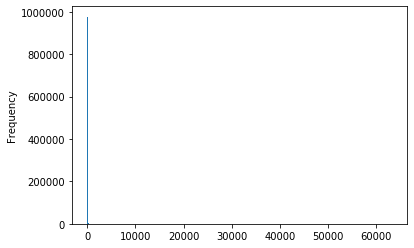

In [60]:
transport.delta_sec.plot.hist(bins=1000);

In [660]:
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time,date_hours,month
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.5,0.108333,"[0, 1]",2020-06-01,00:40:38,2020-06-01 01:00:00,June
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.9,0.065733,"[0, 1]",2020-06-01,00:40:48,2020-06-01 01:00:00,June
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.0,0.150283,"[0, 1]",2020-06-01,00:40:54,2020-06-01 01:00:00,June
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.4,0.072717,"[0, 1]",2020-06-01,00:40:49,2020-06-01 01:00:00,June
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.4,0.056283,"[0, 1]",2020-06-01,00:41:02,2020-06-01 01:00:00,June


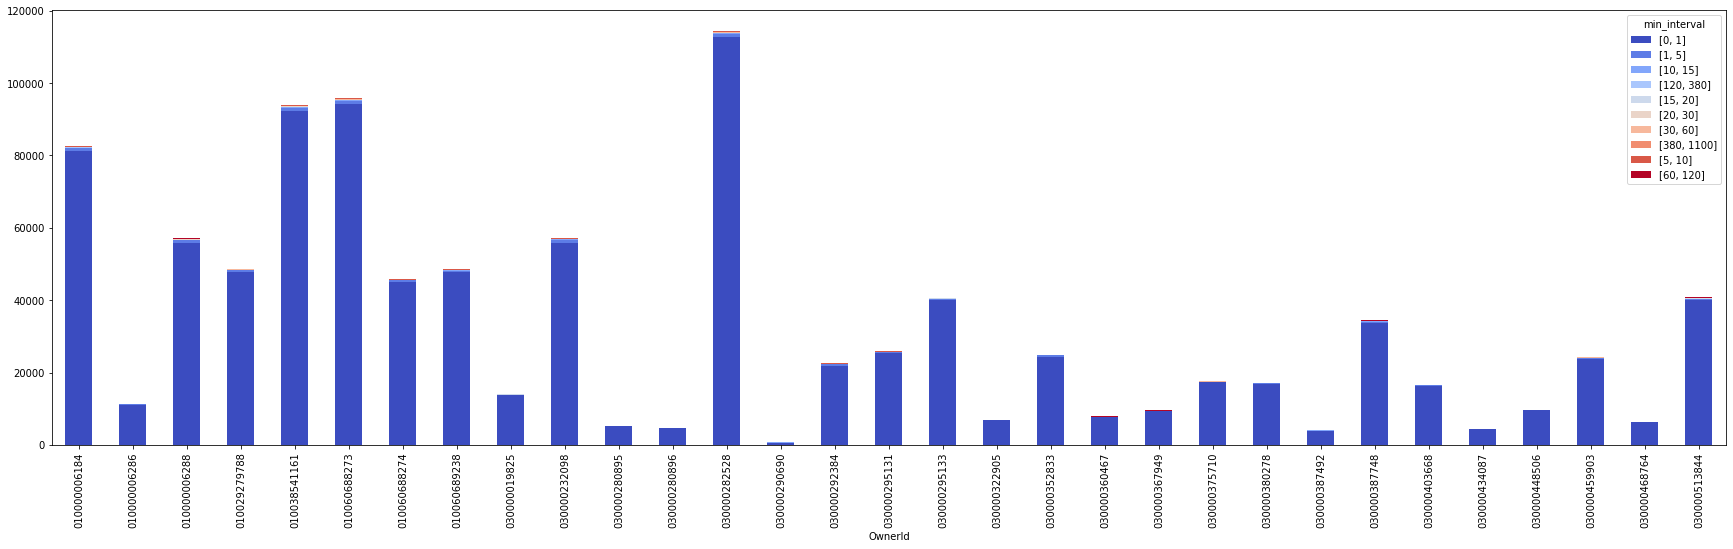

In [661]:
pd.pivot_table(transport, index='OwnerId', columns='min_interval', values='WBId', aggfunc='count').plot.bar(stacked=True, figsize=(30, 8), cmap='coolwarm')

In [668]:
by_owner = pd.pivot_table(transport, index='OwnerId', columns='min_interval', values='WBId', aggfunc='count').fillna(0)
by_owner = by_owner.sort_values('[0, 1]', ascending=False)
col = by_owner.columns
by_owner = pd.DataFrame([by_owner[i] / by_owner.sum(axis=1) for i in by_owner.columns]).T
by_owner.columns = col
by_owner = by_owner[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]', '[120, 380]',  '[380, 1100]']]
by_owner = (by_owner*100).round(3)
by_owner

min_interval,"[0, 1]","[1, 5]","[5, 10]","[10, 15]","[15, 20]","[20, 30]","[30, 60]","[60, 120]","[120, 380]","[380, 1100]"
OwnerId,,,,,,,,,,
030000282528,98.425,0.842,0.211,0.107,0.056,0.072,0.117,0.114,0.058,NaN
010060688273,98.389,0.850,0.224,0.112,0.065,0.076,0.078,0.138,0.069,NaN
010038541161,98.321,0.950,0.209,0.106,0.078,0.061,0.101,0.122,0.052,NaN
010000006184,98.280,0.931,0.218,0.099,0.073,0.094,0.115,0.147,0.042,0.001
030000232098,97.783,1.334,0.278,0.191,0.054,0.103,0.100,0.107,0.047,0.003
010000006288,98.018,1.197,0.200,0.128,0.068,0.091,0.144,0.098,0.056,NaN
010029279788,98.034,1.058,0.292,0.166,0.039,0.064,0.158,0.117,0.072,NaN
010060689238,98.184,0.990,0.226,0.136,0.045,0.082,0.142,0.144,0.049,NaN
010060688274,98.237,0.878,0.240,0.137,0.063,0.098,0.153,0.157,0.037,NaN


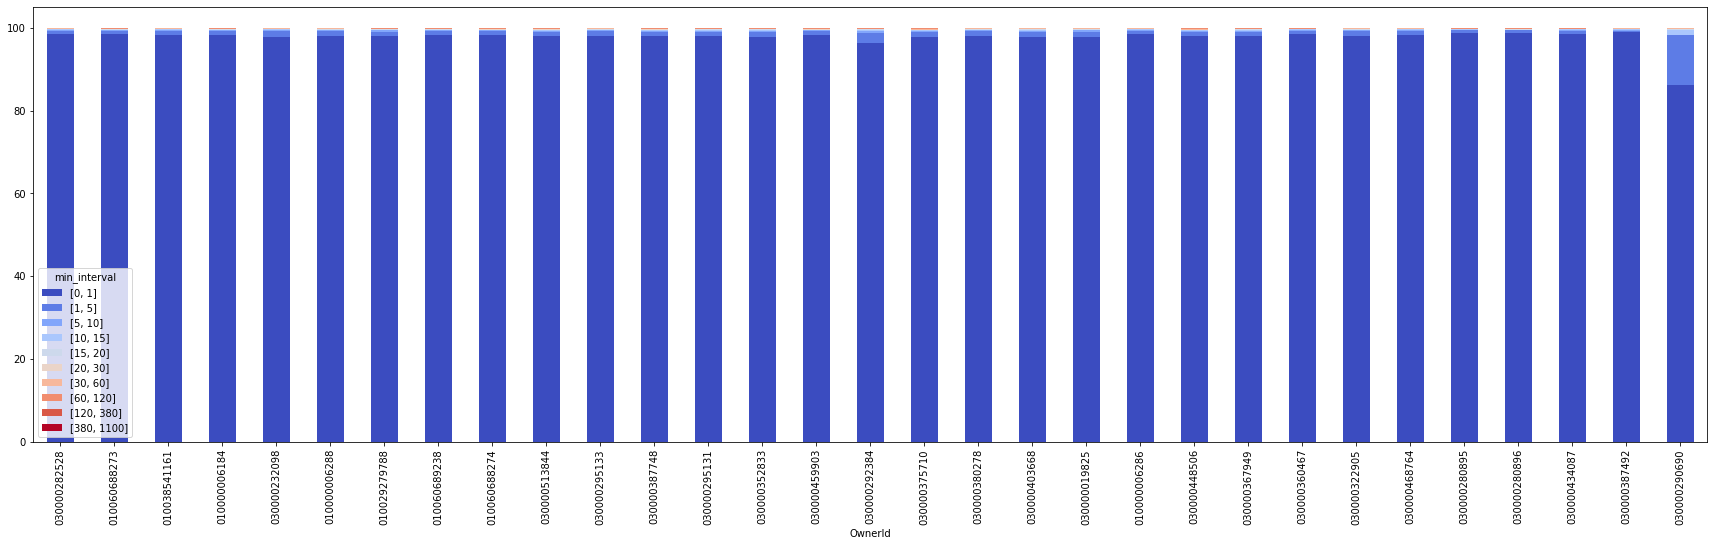

In [669]:
by_owner.plot.bar(stacked=True, figsize=(30, 8), cmap='coolwarm')

# Количество документов по интервалам [0,1],[1,5],[5,10],[10,15],[15,20],[20,30],[30,60],[60,120],[120,380]

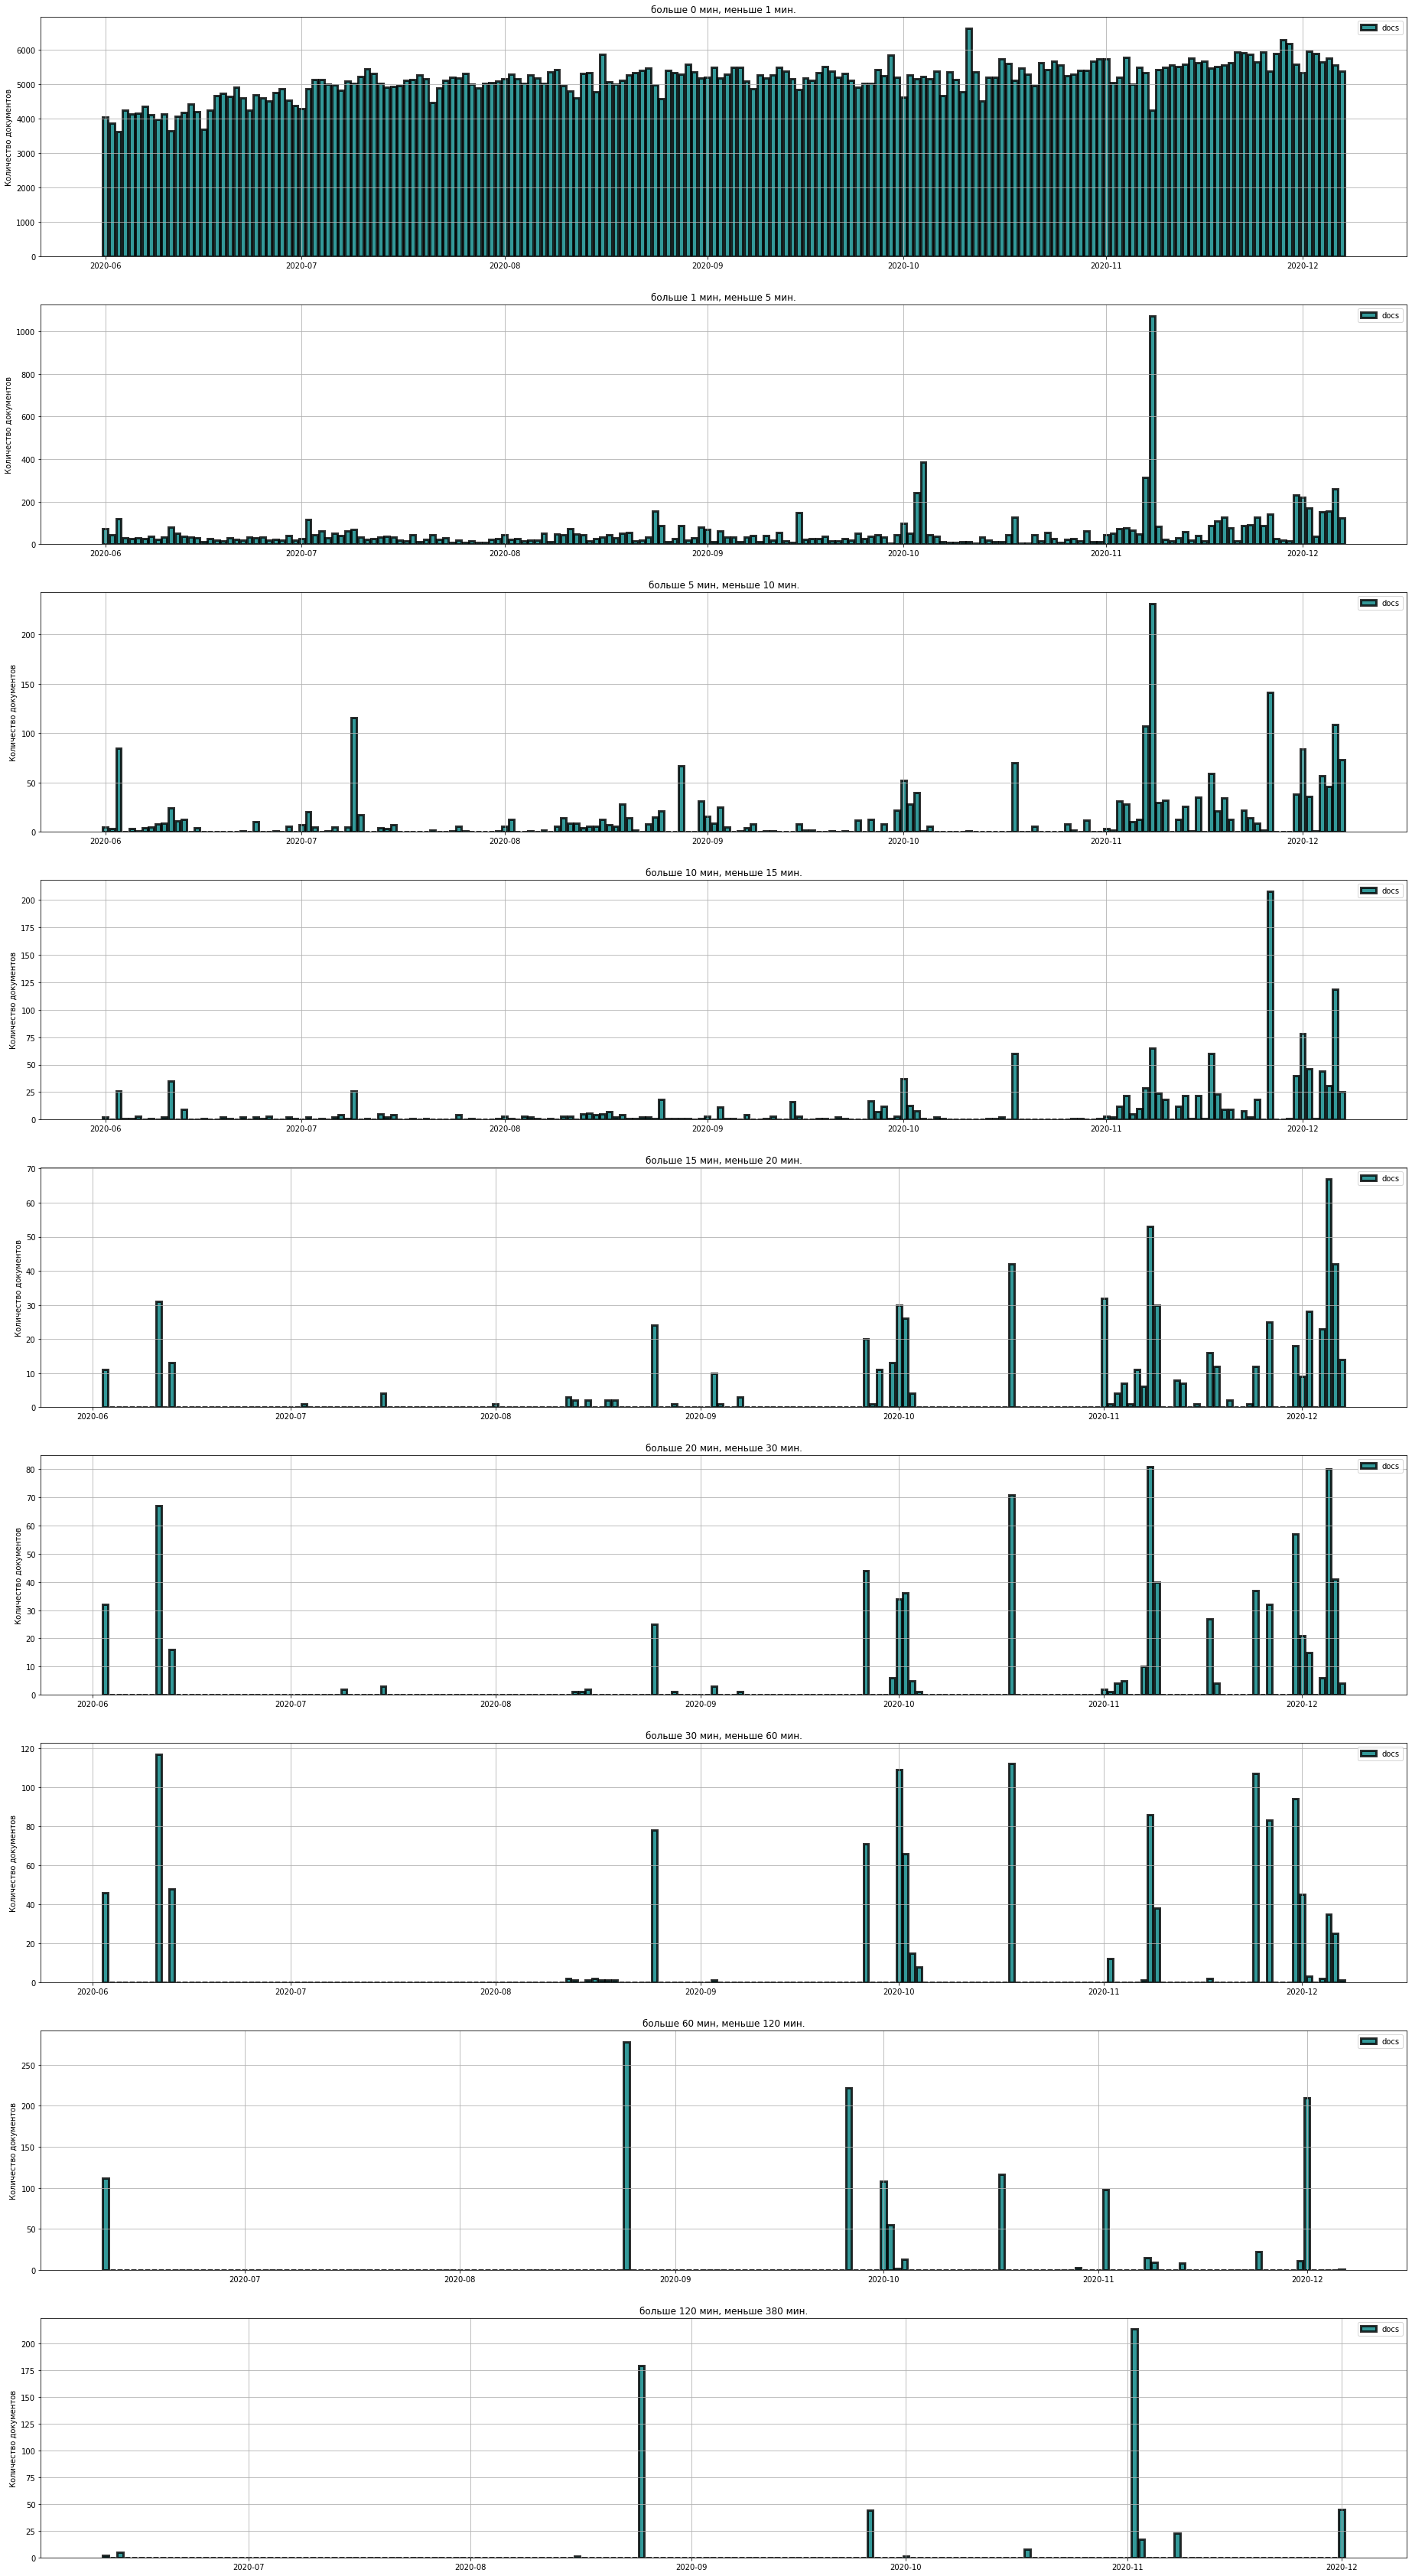

In [80]:
plt.figure(figsize=(32, 68))
for i in enumerate([[0,1],[1,5],[5,10],[10,15],[15,20],[20,30],[30,60],[60,120],[120,380]]):
    plt.subplot(10, 1, i[0] + 1)
    plt.bar(transport[(transport['delta_min']>i[1][0]) & (transport['delta_min']<=i[1][1])].set_index('InsertDate')['delta_sec'].resample('d').agg('count').index, 
            transport[(transport['delta_min']>i[1][0]) & (transport['delta_min']<=i[1][1])].set_index('InsertDate')['delta_sec'].resample('d').agg('count').values,
           edgecolor='black', linewidth=3, color='teal', label = 'docs', alpha=0.8)
    plt.title('больше {} мин, меньше {} мин.'.format(i[1][0], i[1][1]))
    plt.grid()
    plt.legend()
    plt.ylabel('Количество документов')
plt.show();

# Сколько документов больше часа. Для проверки

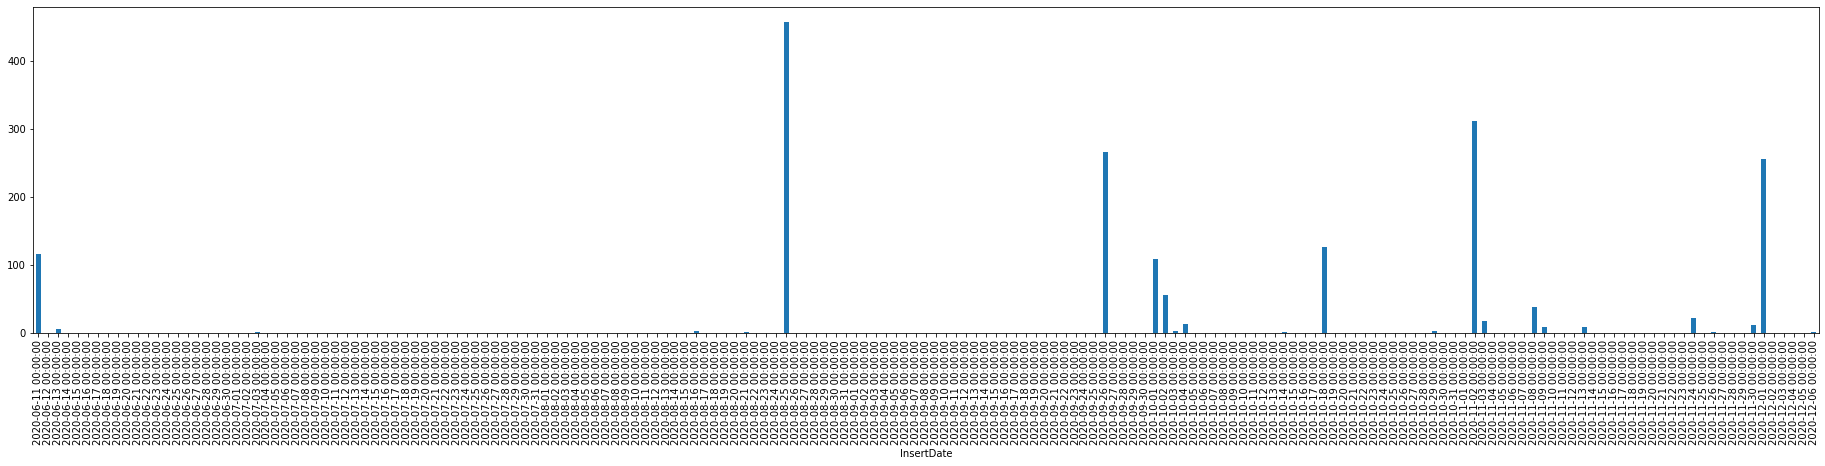

In [81]:
transport[(transport['delta_min']>60)].set_index('InsertDate')['delta_sec'].resample('d').agg('count').plot.bar(figsize=(32, 6));

# Попытка посчитать количество уникальных дней по интервалам

In [96]:
min_interval = []
for i in transport.delta_min:
    for j in [[0,1],[1,5],[5,10],[10,15],[15,20],[20,30],[30,60],[60,120],[120,380], [380,1100]]:
        if i > j[0] and i<=j[1]:
            min_interval.append(j)

len(min_interval)

994543

In [101]:
transport['min_interval'] = min_interval
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.500,0.108333,"[0, 1]"
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.944,0.065733,"[0, 1]"
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.017,0.150283,"[0, 1]"
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.363,0.072717,"[0, 1]"
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.377,0.056283,"[0, 1]"


In [106]:
transport['min_interval'] = transport['min_interval'].astype(str)

In [114]:
transport['day'] = transport['InsertDate'].dt.date

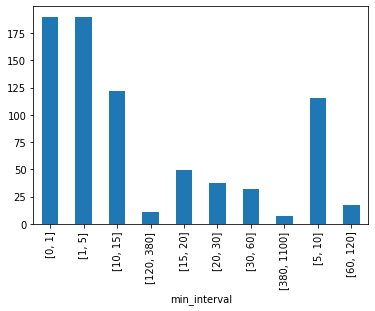

In [116]:
transport.groupby('min_interval')['day'].nunique().plot.bar()

In [182]:
pd.pivot_table(transport, index='day', columns='min_interval', values='WBId', aggfunc='count').head()

min_interval,"[0, 1]","[1, 5]","[10, 15]","[120, 380]","[15, 20]","[20, 30]","[30, 60]","[380, 1100]","[5, 10]","[60, 120]"
day,,,,,,,,,,
2020-06-01,4045.0,73.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
2020-06-02,3879.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2020-06-03,3633.0,120.0,26.0,NaN,11.0,32.0,46.0,NaN,85.0,NaN
2020-06-04,4250.0,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,4142.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN


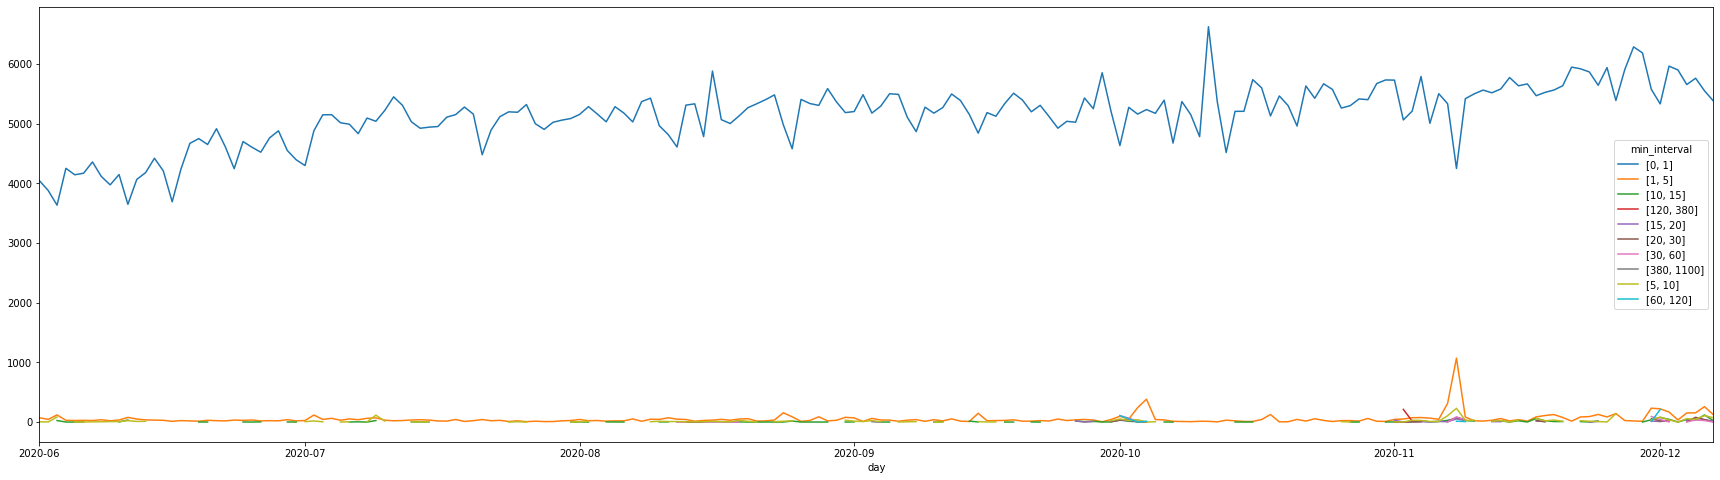

In [121]:
pd.pivot_table(transport, index='day', columns='min_interval', values='WBId', aggfunc='count').plot(figsize=(30,8))

In [123]:
pivot = pd.pivot_table(transport, index='day', columns='min_interval', values='WBId', aggfunc='count')

In [133]:
pivot.index = pd.DatetimeIndex(pivot.index)

In [137]:
pivot.resample('m').sum()

min_interval,"[0, 1]","[1, 5]","[10, 15]","[120, 380]","[15, 20]","[20, 30]","[30, 60]","[380, 1100]","[5, 10]","[60, 120]"
day,,,,,,,,,,
2020-06-30,129384.0,1047.0,95.0,7.0,55.0,115.0,211.0,2.0,193.0,112.0
2020-07-31,156179.0,1027.0,56.0,0.0,5.0,5.0,0.0,1.0,201.0,0.0
2020-08-31,160981.0,1309.0,80.0,180.0,37.0,30.0,87.0,2.0,288.0,278.0
2020-09-30,157565.0,1029.0,88.0,44.0,59.0,54.0,72.0,0.0,139.0,222.0
2020-10-31,164971.0,1478.0,129.0,9.0,102.0,147.0,310.0,3.0,226.0,297.0
2020-11-30,167313.0,3278.0,626.0,253.0,247.0,300.0,423.0,1.0,915.0,163.0
2020-12-31,39528.0,1118.0,344.0,45.0,183.0,167.0,111.0,0.0,406.0,211.0


In [170]:
pd.to_datetime([i[1]]).month_name()[0]

'December'

In [174]:
['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]', '[120, 380]',  '[380, 1100]']

In [175]:
pivot_monthly = pivot.resample('m').sum()
pivot_monthly = pivot_monthly[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]', '[120, 380]',  '[380, 1100]']]
pivot_monthly

min_interval,"[0, 1]","[1, 5]","[5, 10]","[10, 15]","[15, 20]","[20, 30]","[30, 60]","[60, 120]","[120, 380]","[380, 1100]"
day,,,,,,,,,,
2020-06-30,129384.0,1047.0,193.0,95.0,55.0,115.0,211.0,112.0,7.0,2.0
2020-07-31,156179.0,1027.0,201.0,56.0,5.0,5.0,0.0,0.0,0.0,1.0
2020-08-31,160981.0,1309.0,288.0,80.0,37.0,30.0,87.0,278.0,180.0,2.0
2020-09-30,157565.0,1029.0,139.0,88.0,59.0,54.0,72.0,222.0,44.0,0.0
2020-10-31,164971.0,1478.0,226.0,129.0,102.0,147.0,310.0,297.0,9.0,3.0
2020-11-30,167313.0,3278.0,915.0,626.0,247.0,300.0,423.0,163.0,253.0,1.0
2020-12-31,39528.0,1118.0,406.0,344.0,183.0,167.0,111.0,211.0,45.0,0.0


In [155]:
pivot.resample('m').sum().loc[i[1]].index

Index(['[0, 1]', '[1, 5]', '[10, 15]', '[120, 380]', '[15, 20]', '[20, 30]',
       '[30, 60]', '[380, 1100]', '[5, 10]', '[60, 120]'],
      dtype='object', name='min_interval')

# Распределение тайминга по месяцам

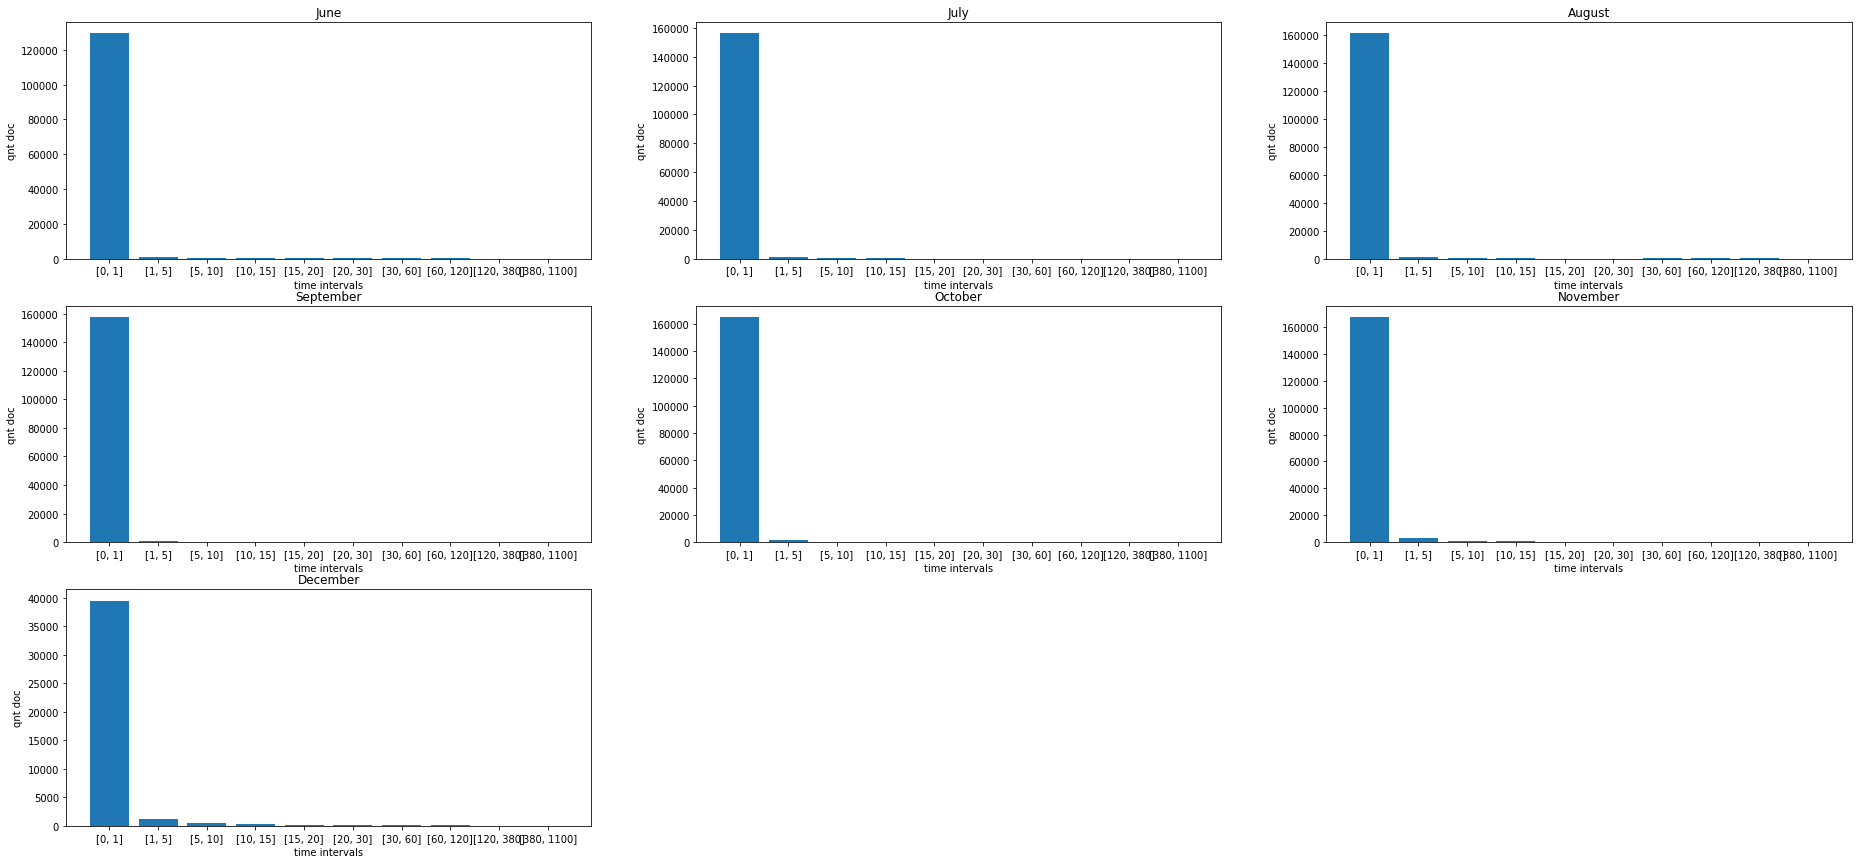

In [179]:
plt.figure(figsize=(32, 20))
for i in enumerate(pivot_monthly.index):
    plt.subplot(4, 3, i[0] + 1)
    plt.bar(pivot_monthly.loc[i[1]].index, pivot_monthly.loc[i[1]].values)
    plt.title(pd.to_datetime([i[1]]).month_name()[0])
    plt.ylabel('qnt doc')
    plt.xlabel('time intervals')
    
plt.show();

# Группировка в один график

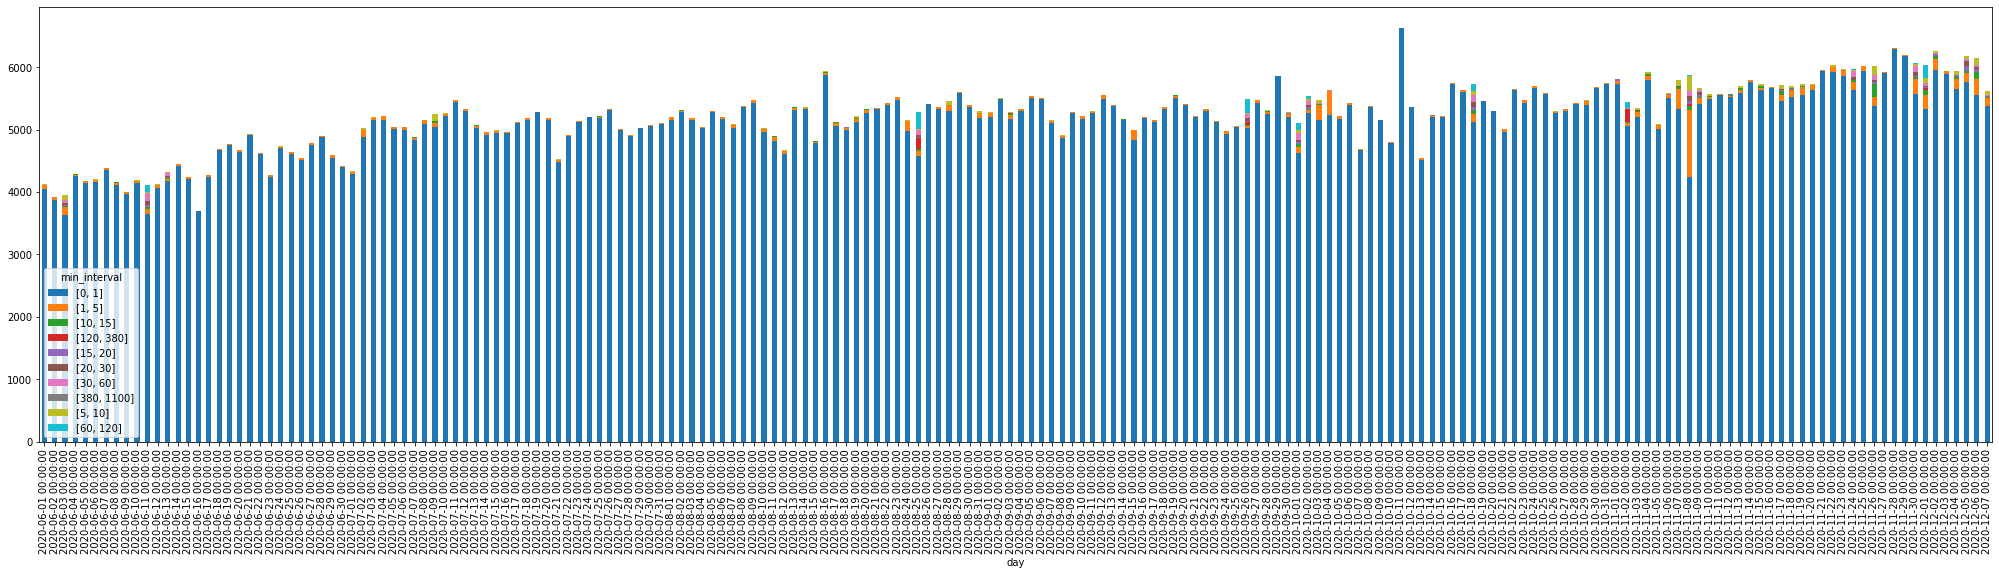

In [181]:
pivot.plot.bar(figsize=(35, 8), stacked=True);

# По месяцам

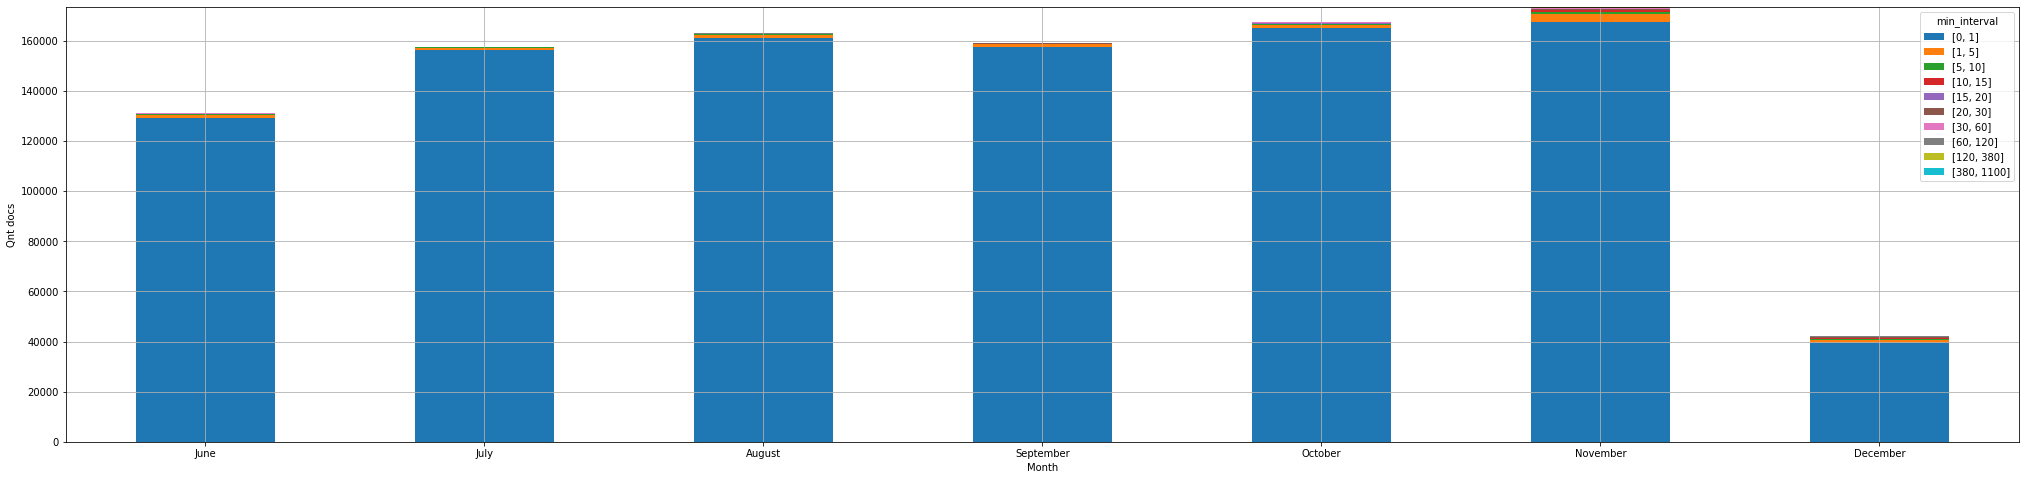

In [227]:
ax = pivot_monthly.plot(kind='bar', xticks=pivot_monthly.index.month, rot=0, stacked=True, figsize=(35, 8), grid=True)
ax.set_xticklabels(pivot_monthly.index.month_name().to_list())
plt.ylabel('Qnt docs')
plt.xlabel('Month');

# Дни с жалобами

In [246]:
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.500,0.108333,"[0, 1]",2020-06-01,00:40:38.737000
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.944,0.065733,"[0, 1]",2020-06-01,00:40:48.247000
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.017,0.150283,"[0, 1]",2020-06-01,00:40:54.147000
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.363,0.072717,"[0, 1]",2020-06-01,00:40:49.940000
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.377,0.056283,"[0, 1]",2020-06-01,00:41:02.007000


In [263]:
# pd.to_datetime(transport.InsertDate.dt.strftime('%Y-%m-%d %H:%M:%S')).dt.time

In [276]:
transport['time'] = pd.to_datetime(transport.InsertDate.dt.strftime('%Y-%m-%d %H:%M:%S')).dt.time

In [266]:
trouble_day = ['2020-11-30', '2020-12-01', '2020-12-04', '2020-12-05']

In [267]:
trouble_day = pd.to_datetime(trouble_day)

# Проблемные дни коричневые

### сумма интервалов

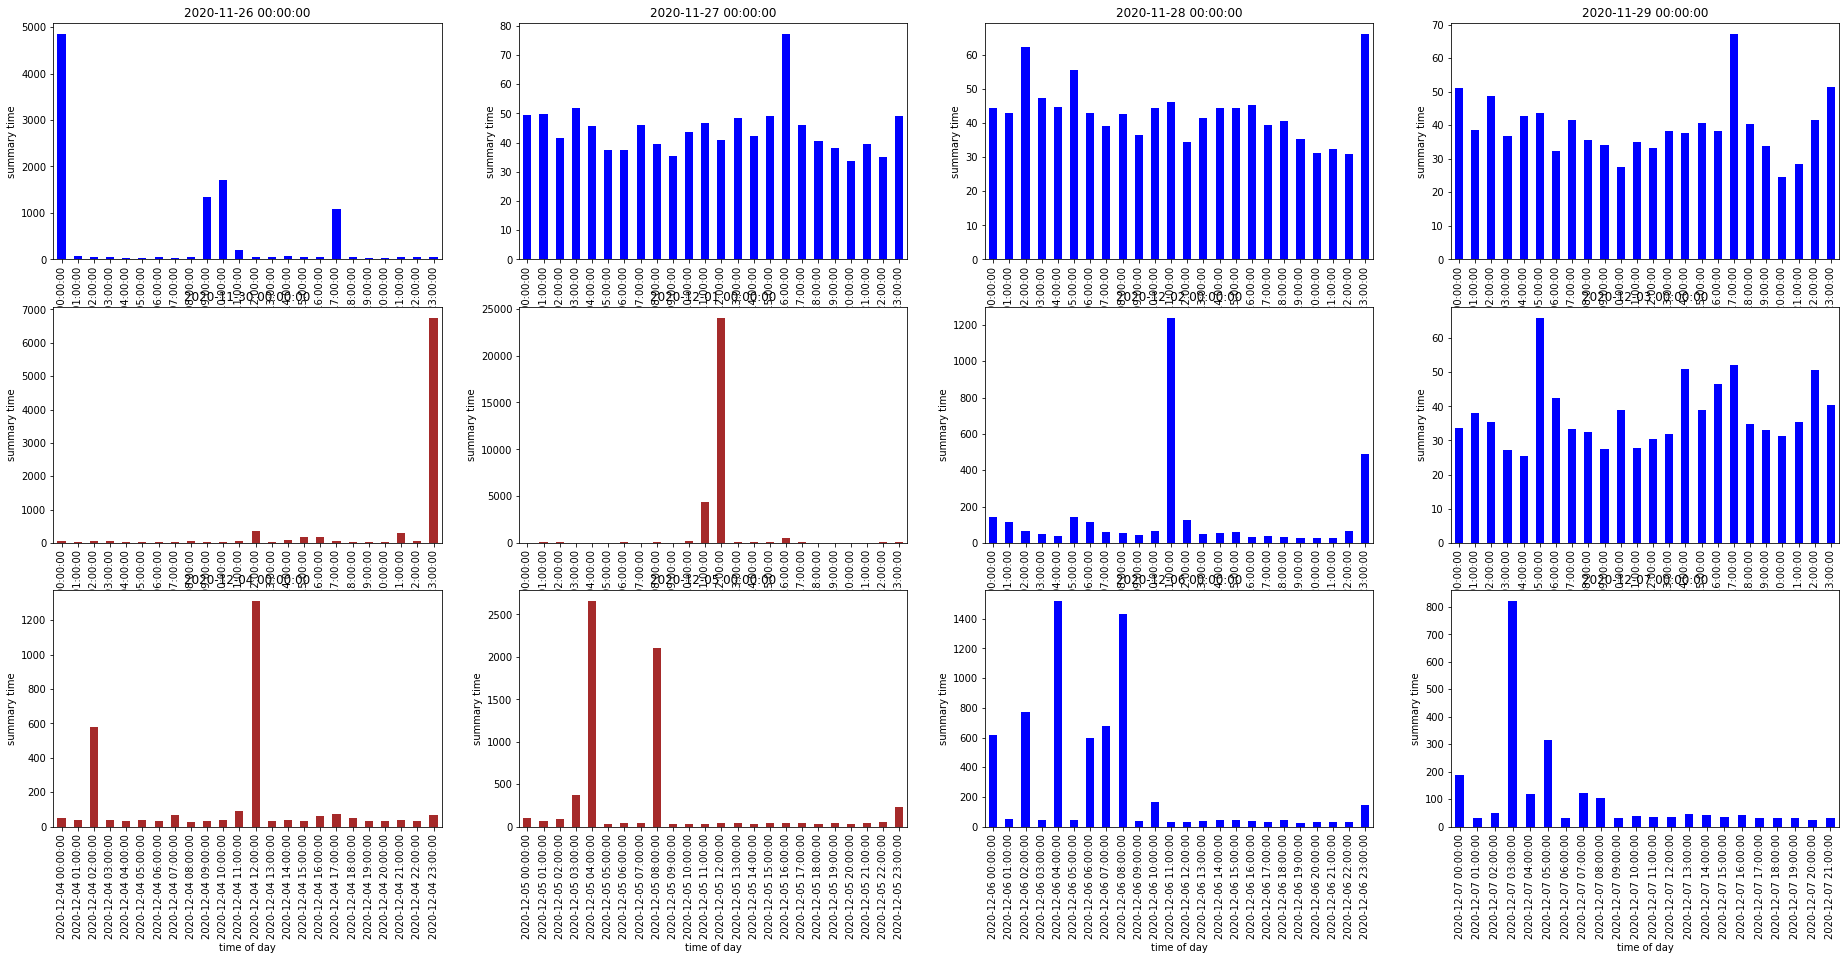

In [318]:
plt.figure(figsize=(32, 20))
for n, i in enumerate(pd.date_range('2020-11-26', '2020-12-07')):
    try:
        plt.subplot(4, 4, n + 1)
        if i in trouble_day:
            transport[(transport['day']==i)].set_index('InsertDate').resample('H').sum().delta_min.plot.bar(color='brown')
        else:
            transport[(transport['day']==i)].set_index('InsertDate').resample('H').sum().delta_min.plot.bar(color='blue')
        plt.title(i)
        plt.ylabel('summary time')
        plt.xlabel('time of day')
    except:
        pass
plt.show();

### количество документов

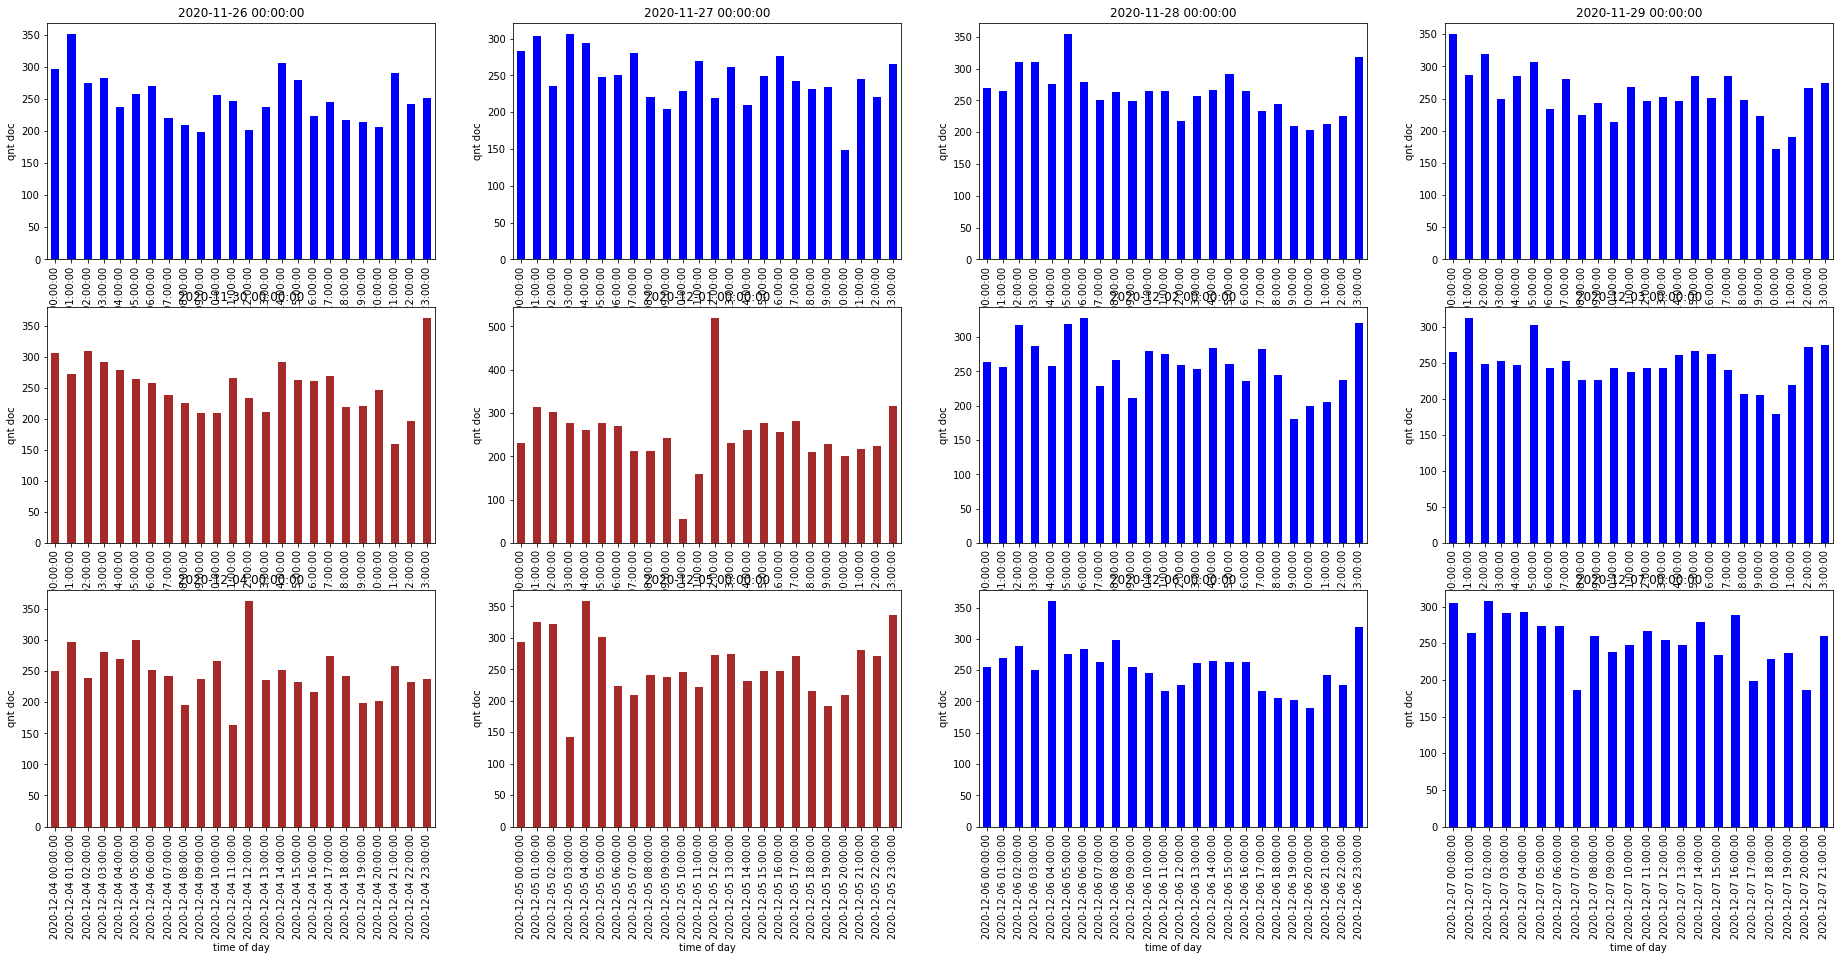

In [379]:
plt.figure(figsize=(32, 20))
for n, i in enumerate(pd.date_range('2020-11-26', '2020-12-07')):
    try:
        plt.subplot(4, 4, n + 1)
        if i in trouble_day:
            transport[(transport['day']==i)].set_index('InsertDate').resample('H').count().delta_min.plot.bar(color='brown')
        else:
            transport[(transport['day']==i)].set_index('InsertDate').resample('H').count().delta_min.plot.bar(color='blue')
        plt.title(i)
        plt.ylabel('qnt doc')
        plt.xlabel('time of day')
    except:
        pass
plt.show();

# Обычные дни август-сентябрь

### сумма интервалов

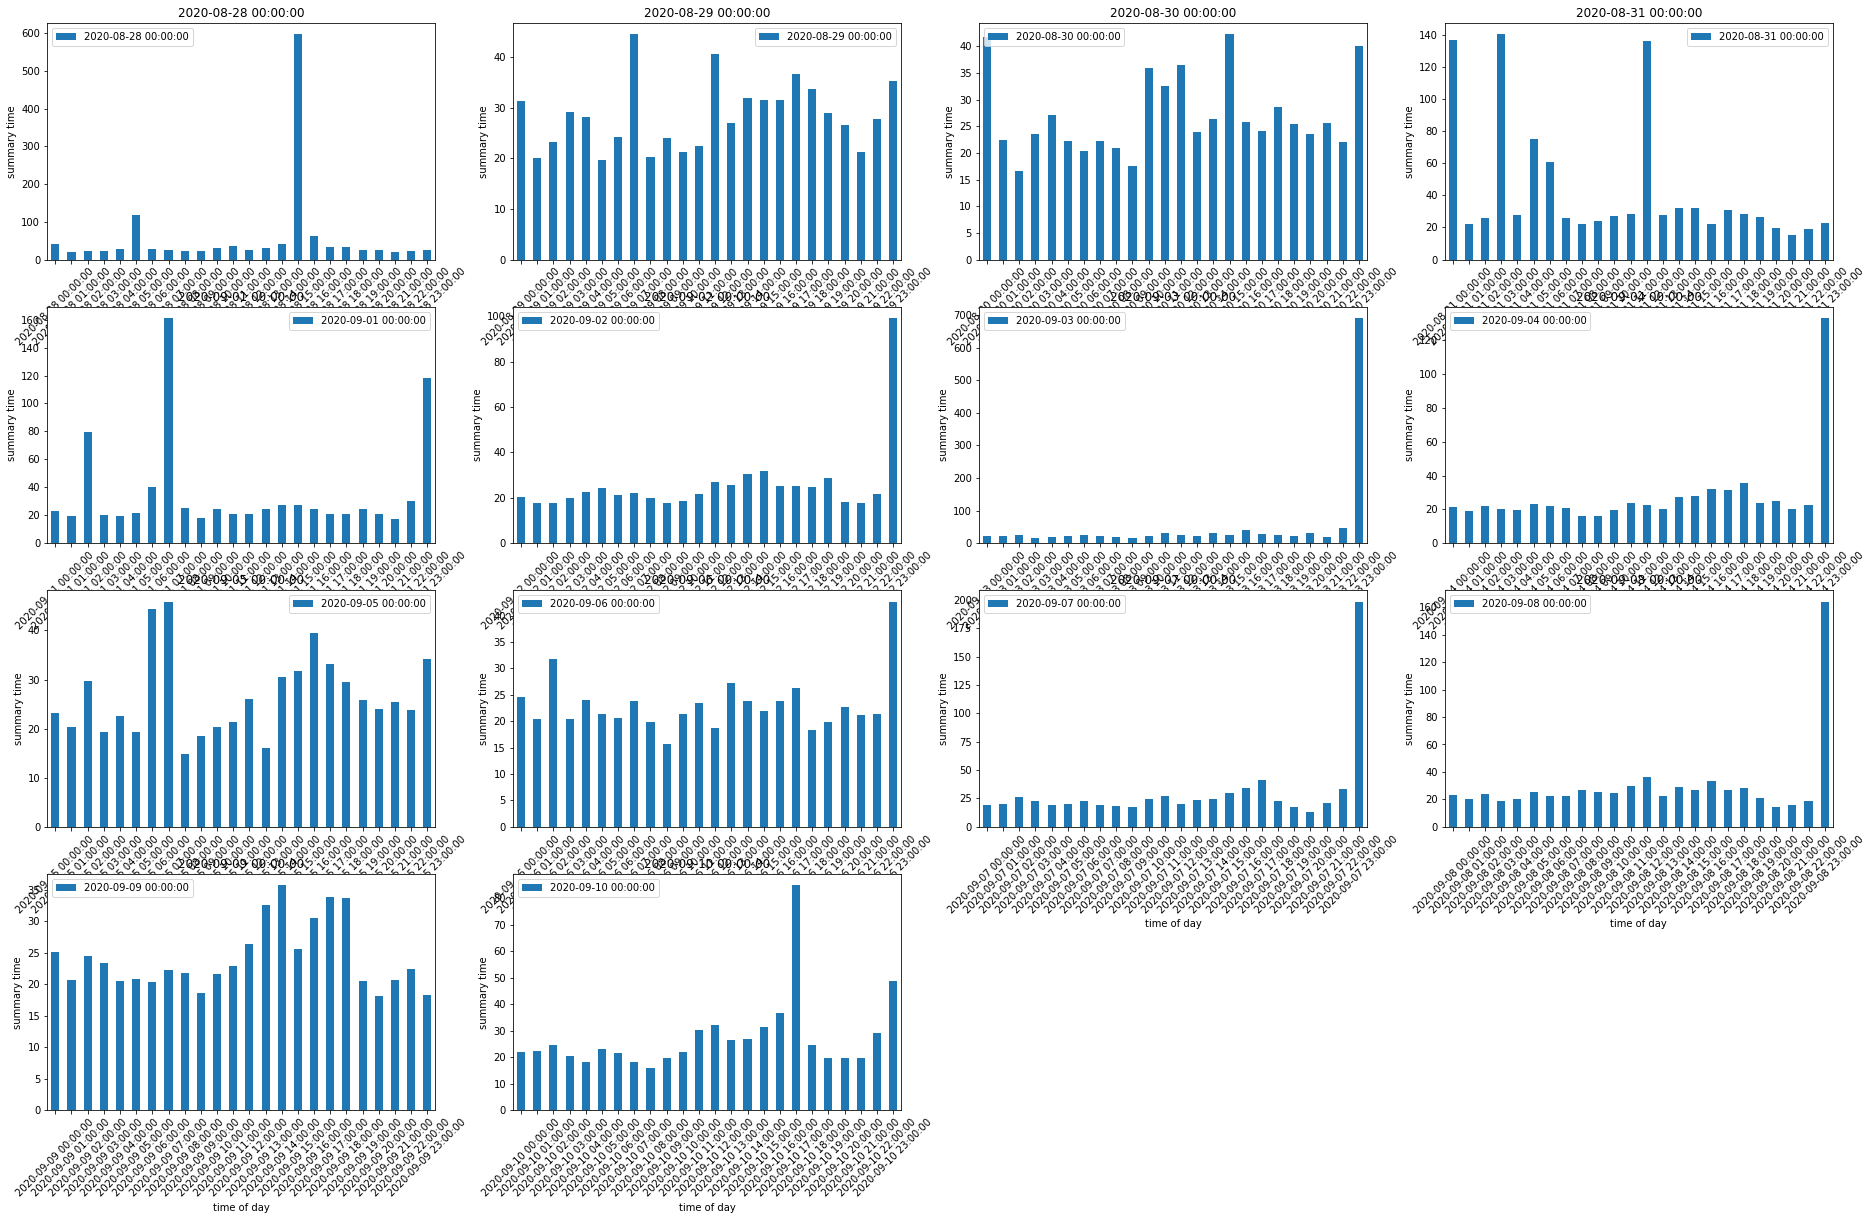

In [367]:
plt.figure(figsize=(32, 20))
for n, i in enumerate(pd.date_range('2020-08-28', '2020-09-10')):
    plt.subplot(4, 4, n + 1)
    transport[(transport['day']==i)].set_index('InsertDate').resample('H').sum().delta_min.plot.bar(rot=45, label=i);
    plt.legend()
    plt.title(i)
    plt.ylabel('summary time')
    plt.xlabel('time of day')
    
plt.show();

In [310]:
transport['date_hours'] = pd.to_datetime(transport.InsertDate.dt.strftime('%Y-%m-%d %H:%M:%S')).dt.round('H')
transport.head(1)

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time,date_hours
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.5,0.108333,"[0, 1]",2020-06-01,00:40:38,2020-06-01 01:00:00


# 1 декабря кол-во документов по временным интервалам

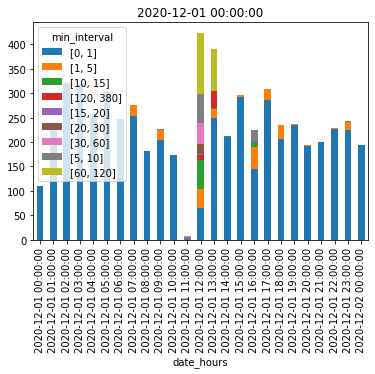

In [539]:
day_x = pd.to_datetime('2020-12-01')
pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='WBId', aggfunc='count')\
.plot.bar(stacked=True, title=day_x);

### 30 ноября

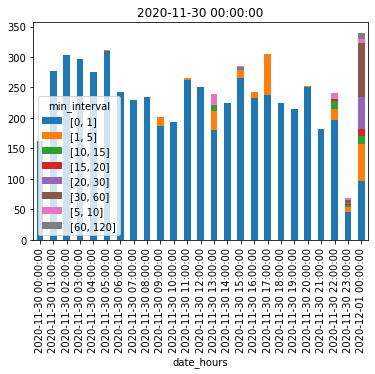

In [380]:
day_x = pd.to_datetime('2020-11-30')
pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='delta_min', aggfunc='count')\
.plot.bar(stacked=True, title=day_x);

# период с 26 ноября по 07 декабря

# UnStacked plot

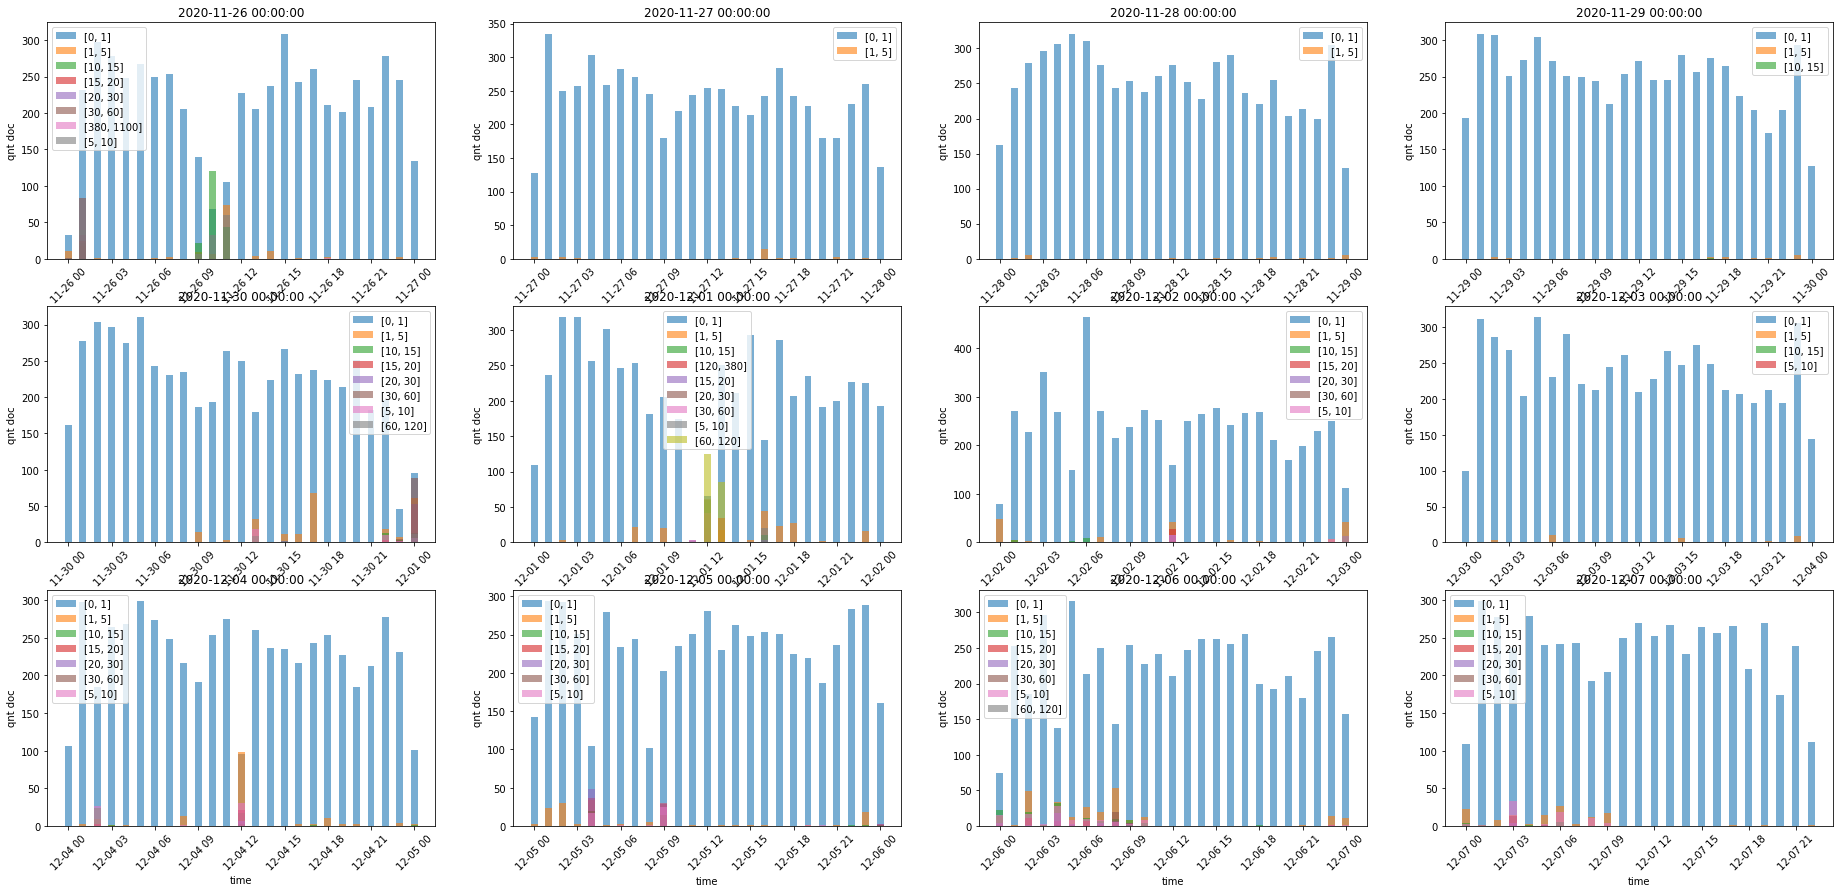

In [368]:
plt.figure(figsize=(32, 20))
for n, i in enumerate(pd.date_range('2020-11-26', '2020-12-07')):
    plt.subplot(4, 4, n + 1)
    data = pd.pivot_table(transport[(transport['day']==i)], index='date_hours', columns='min_interval', values='delta_min', aggfunc='count')
    for c in data:
        plt.bar(data.index, data[c], width=0.02, label=c, alpha=0.6)
    plt.title(i)
    plt.ylabel('qnt doc')
    plt.legend()
    plt.xlabel('time')
    plt.xticks(rotation=45)
plt.show();

In [381]:
transport.head()

,rcn,OwnerId,CurrSize,Created,InsertDate,WBId,,delta_sec,delta_min,min_interval,day,time,date_hours
0,1966350618,010060689238,234780,2020-06-01 00:40:32.237,2020-06-01 00:40:38.737,TTN-0383685103,0,6.500,0.108333,"[0, 1]",2020-06-01,00:40:38,2020-06-01 01:00:00
1,1966350850,030000448506,116362,2020-06-01 00:40:44.303,2020-06-01 00:40:48.247,TTN-0383685105,0,3.944,0.065733,"[0, 1]",2020-06-01,00:40:48,2020-06-01 01:00:00
2,1966350866,030000387748,422215,2020-06-01 00:40:45.130,2020-06-01 00:40:54.147,TTN-0383685109,0,9.017,0.150283,"[0, 1]",2020-06-01,00:40:54,2020-06-01 01:00:00
3,1966350877,030000448506,156283,2020-06-01 00:40:45.577,2020-06-01 00:40:49.940,TTN-0383685110,0,4.363,0.072717,"[0, 1]",2020-06-01,00:40:49,2020-06-01 01:00:00
4,1966351142,030000513844,108367,2020-06-01 00:40:58.630,2020-06-01 00:41:02.007,TTN-0383685122,1,3.377,0.056283,"[0, 1]",2020-06-01,00:41:02,2020-06-01 01:00:00


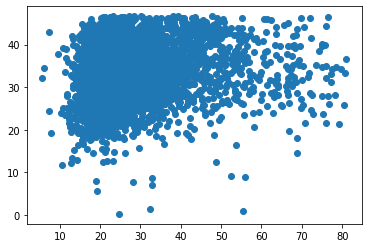

In [386]:
plt.scatter(transport.groupby('date_hours')['delta_min'].sum()[transport.groupby('date_hours')['delta_min'].sum()<np.percentile(transport.groupby('date_hours')['delta_min'].sum(), 95)], 
            transport.groupby('date_hours')['CurrSize'].sum()[transport.groupby('date_hours')['CurrSize'].sum()<np.percentile(transport.groupby('date_hours')['CurrSize'].sum(), 95)]/1024/1024)

# Красивые графики для отчета

In [391]:
pivot = pivot[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]', '[120, 380]',  '[380, 1100]']]

In [563]:
pivot.columns = ['менее 1 минуты', 'от 1 до 5 мин.', 'от 5 до 10 мин.', 'от 10 до 15 мин.', 'от 12 до 20 мин.', 'от 20 до 30 мин.', 'от 30 мин. до 1 часа', 'от 1 до 2 часов', 
 'от 2 до 6 часов',  'более 6 часов']

In [653]:
pivot.loc['2020-11-30'].to_excel('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/trouble.xlsx')

In [659]:
pivot[pivot.index.isin(['2020-11-30', '2020-12-01', '2020-12-04', '2020-12-05'])]\
.to_excel('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/trouble.xlsx')

# Последние 3 недели по дням

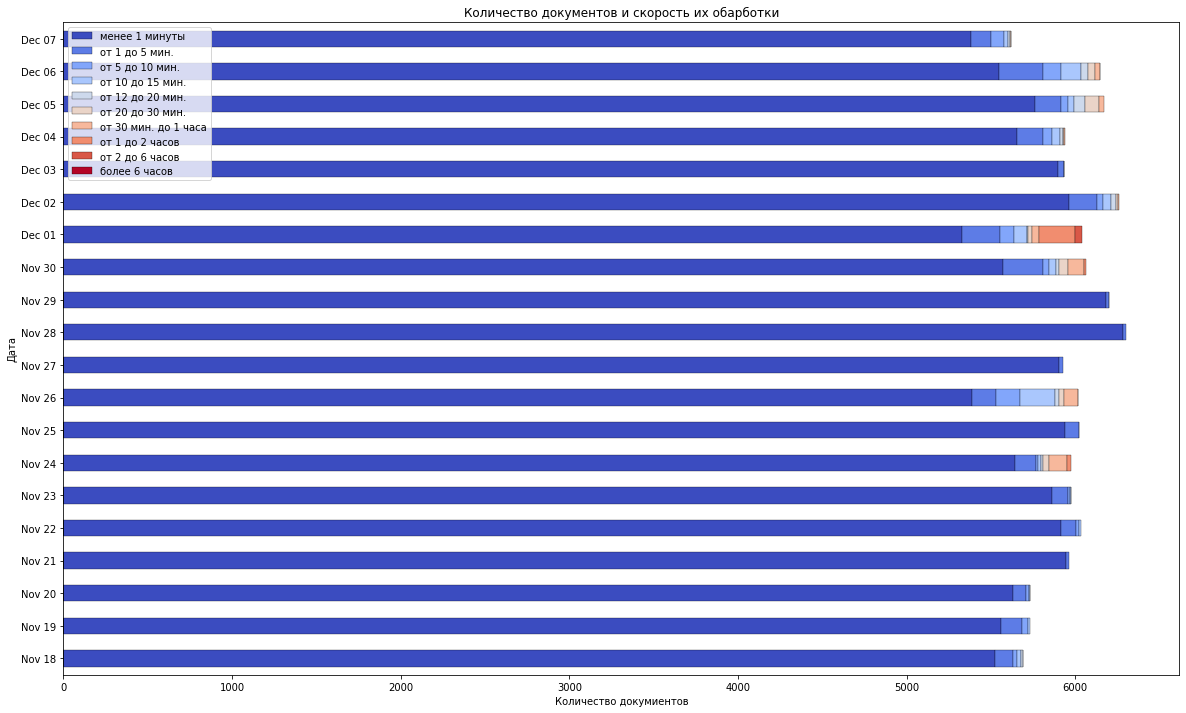

In [623]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

ax = pivot.iloc[170:,:].plot.barh(figsize=(20, 12), stacked=True, title = 'Количество документов и скорость их обарботки', cmap='coolwarm', edgecolor='black', linewidth=0.3)
ticklabels = [item.strftime('%b %d') for item in pivot[170:].index]
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel('Дата')
ax.set_xlabel('Количество докумиентов')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/dayly_chart.png');

In [565]:
pivot_monthly = pivot.resample('m').sum()

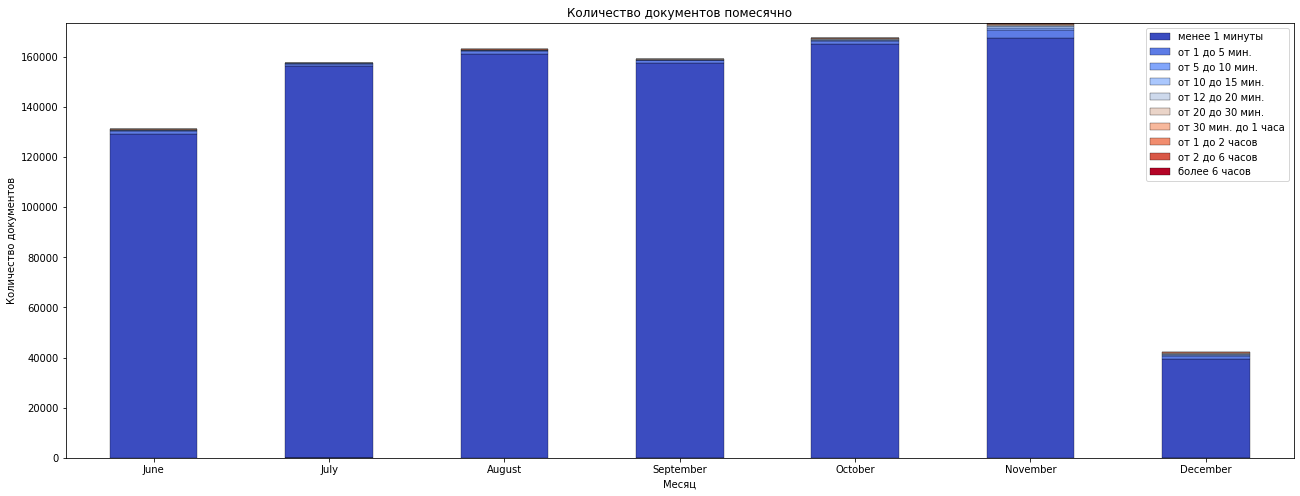

In [638]:
ax = pivot_monthly.plot(kind='bar', xticks=pivot_monthly.index.month, rot=0, stacked=True, figsize=(22, 8), cmap='coolwarm', edgecolor='black', linewidth=0.3)
ax.set_xticklabels(pivot_monthly.index.month_name().to_list())
plt.title('Количество документов помесячно')
plt.ylabel('Количество документов')
plt.xlabel('Месяц')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/monthly_chart.png');

# Таблица с долями в процентах по месяцам

In [622]:
pivot_monthly.reset_index().to_excel('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/table by month abs val.xlsx')

In [615]:
pivot_monthly_sh = pd.DataFrame([pivot_monthly[i] / pivot_monthly.sum(axis=1) for i in pivot_monthly.columns]).T
pivot_monthly_sh.columns = pivot_monthly.columns
pivot_monthly_sh = (pivot_monthly_sh*100).round(3)
pivot_monthly_sh.index = pivot_monthly.index.month_name()
pivot_monthly_sh.index.names = ['Month']
pivot_monthly_sh.to_excel('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/table by month.xlsx')
pivot_monthly_sh.reset_index()

,Month,менее 1 минуты,от 1 до 5 мин.,от 5 до 10 мин.,от 10 до 15 мин.,от 12 до 20 мин.,от 20 до 30 мин.,от 30 мин. до 1 часа,от 1 до 2 часов,от 2 до 6 часов,более 6 часов
0,June,98.600,0.798,0.147,0.072,0.042,0.088,0.161,0.085,0.005,0.002
1,July,99.178,0.652,0.128,0.036,0.003,0.003,0.000,0.000,0.000,0.001
2,August,98.597,0.802,0.176,0.049,0.023,0.018,0.053,0.170,0.110,0.001
3,September,98.928,0.646,0.087,0.055,0.037,0.034,0.045,0.139,0.028,0.000
4,October,98.389,0.881,0.135,0.077,0.061,0.088,0.185,0.177,0.005,0.002
5,November,96.423,1.889,0.527,0.361,0.142,0.173,0.244,0.094,0.146,0.001
6,December,93.862,2.655,0.964,0.817,0.435,0.397,0.264,0.501,0.107,0.000


In [580]:
cm = sns.light_palette("green", as_cmap=True)

s = pivot_monthly_sh.style.background_gradient(cmap=cm, axis=1)
s

,менее 1 минуты,от 1 до 5 мин.,от 5 до 10 мин.,от 10 до 15 мин.,от 12 до 20 мин.,от 20 до 30 мин.,от 30 мин. до 1 часа,от 1 до 2 часов,от 2 до 6 часов,более 6 часов
Month,,,,,,,,,,
June,98.6,0.798,0.147,0.072,0.042,0.088,0.161,0.085,0.005,0.002
July,99.178,0.652,0.128,0.036,0.003,0.003,0,0,0,0.001
August,98.597,0.802,0.176,0.049,0.023,0.018,0.053,0.17,0.11,0.001
September,98.928,0.646,0.087,0.055,0.037,0.034,0.045,0.139,0.028,0
October,98.389,0.881,0.135,0.077,0.061,0.088,0.185,0.177,0.005,0.002
November,96.423,1.889,0.527,0.361,0.142,0.173,0.244,0.094,0.146,0.001
December,93.862,2.655,0.964,0.817,0.435,0.397,0.264,0.501,0.107,0


# Помесячный график в долях

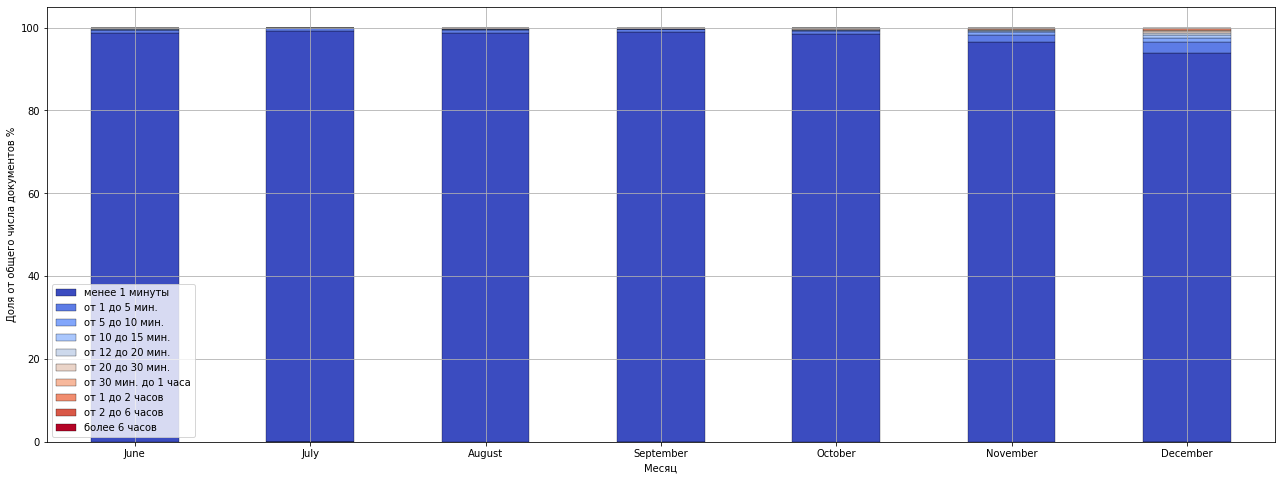

In [595]:
pivot_monthly_sh.plot.bar(stacked=True, grid=True, figsize=(22, 8), rot=0, cmap='coolwarm', edgecolor='black', linewidth=0.3)
plt.ylabel('Доля от общего числа документов %')
plt.xlabel('Месяц');

# 4 проблемных дня по отдельности

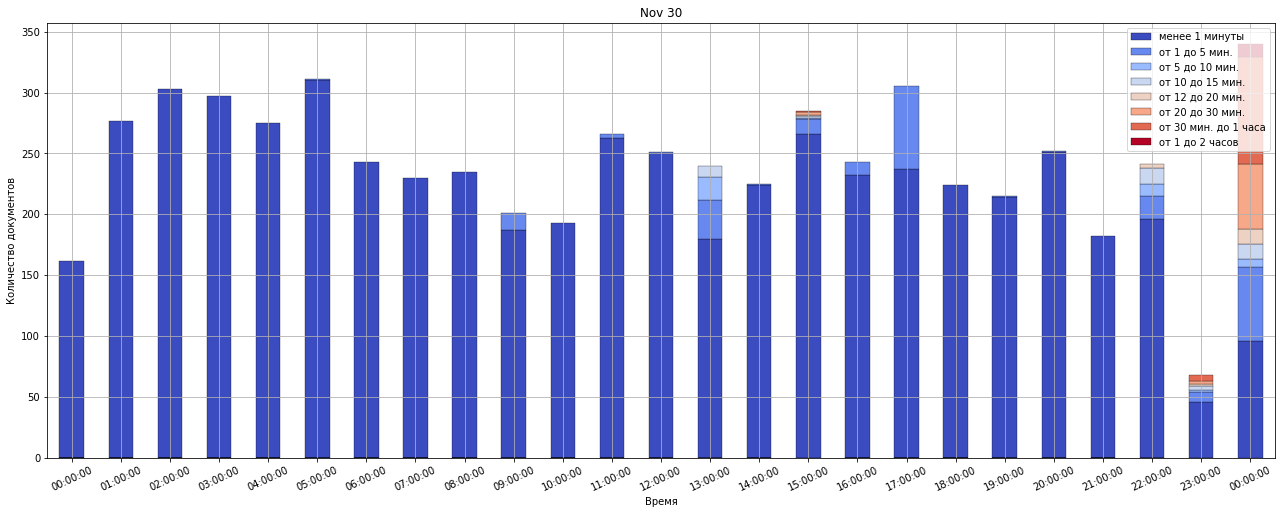

In [639]:
day_x = pd.to_datetime('2020-11-30')
temp_df = pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='WBId', aggfunc='count')
temp_df = temp_df[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]']]
temp_df.columns = ['менее 1 минуты', 'от 1 до 5 мин.', 'от 5 до 10 мин.', 'от 10 до 15 мин.', 'от 12 до 20 мин.', 'от 20 до 30 мин.', 'от 30 мин. до 1 часа', 'от 1 до 2 часов']

ax = temp_df.plot.bar(stacked=True, title=day_x.strftime('%b %d'), grid=True, figsize=(22, 8), rot=25, cmap='coolwarm', edgecolor='black', linewidth=0.3)
ticklabels = [item.time() for item in temp_df.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel('Количество документов')
ax.set_xlabel('Время')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/2020-11-30.png');

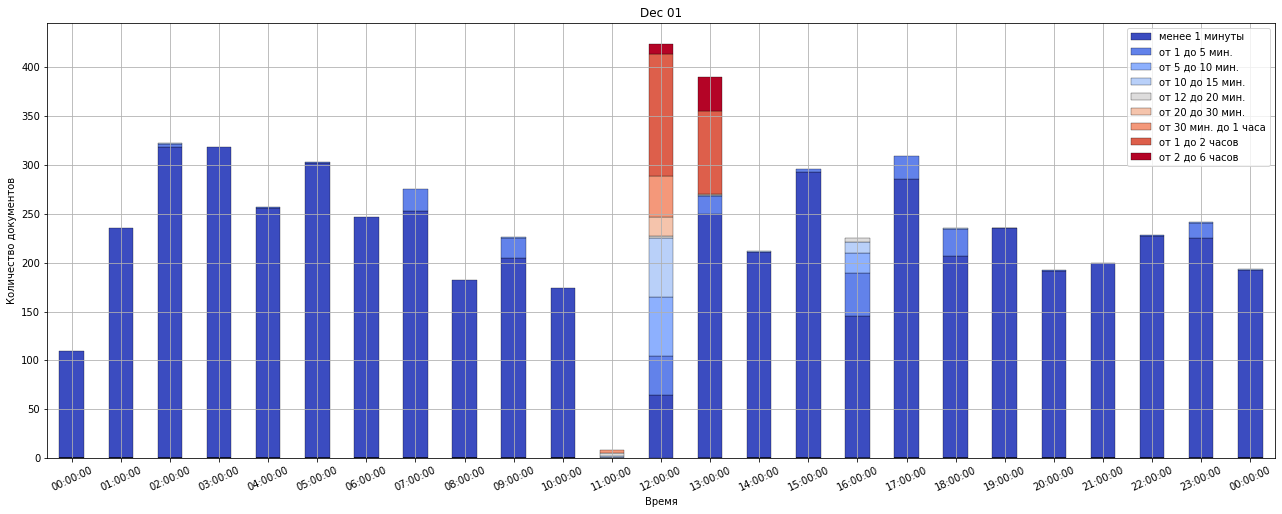

In [617]:
day_x = pd.to_datetime('2020-12-01')
temp_df = pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='WBId', aggfunc='count')
temp_df = temp_df[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]', '[60, 120]', '[120, 380]']]
temp_df.columns = ['менее 1 минуты', 'от 1 до 5 мин.', 'от 5 до 10 мин.', 'от 10 до 15 мин.', 'от 12 до 20 мин.', 'от 20 до 30 мин.', 'от 30 мин. до 1 часа', 'от 1 до 2 часов', 
 'от 2 до 6 часов']

ax = temp_df.plot.bar(stacked=True, title=day_x.strftime('%b %d'), grid=True, figsize=(22, 8), rot=25, cmap='coolwarm', edgecolor='black', linewidth=0.3)
ticklabels = [item.time() for item in temp_df.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel('Количество документов')
ax.set_xlabel('Время')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/2020-12-01.png');

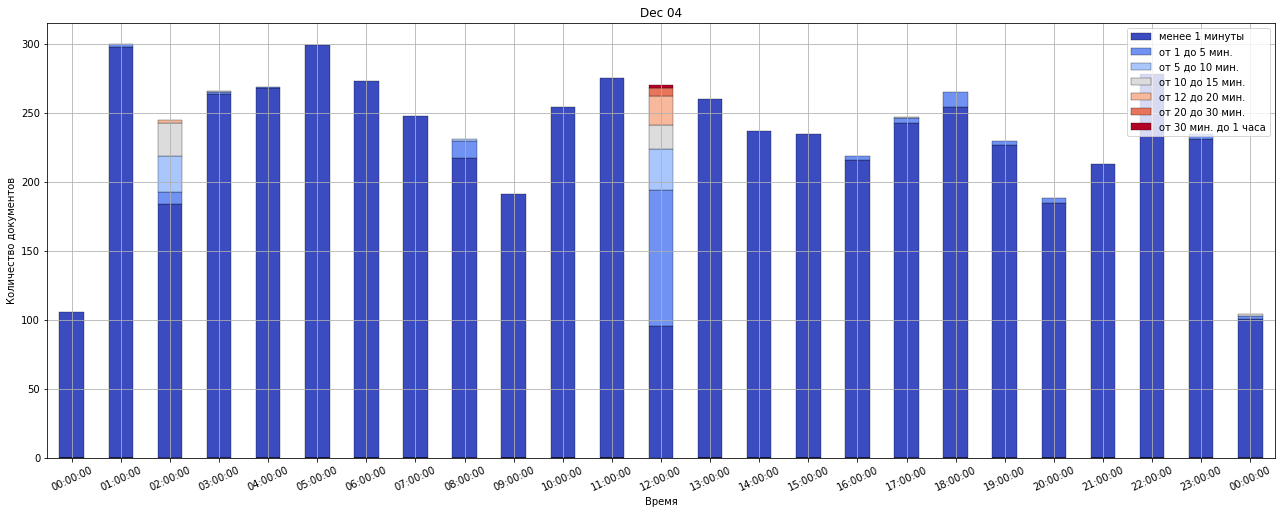

In [618]:
day_x = pd.to_datetime('2020-12-04')
temp_df = pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='WBId', aggfunc='count')
temp_df = temp_df[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]']]
temp_df.columns = ['менее 1 минуты', 'от 1 до 5 мин.', 'от 5 до 10 мин.', 'от 10 до 15 мин.', 'от 12 до 20 мин.', 'от 20 до 30 мин.', 'от 30 мин. до 1 часа']

ax = temp_df.plot.bar(stacked=True, title=day_x.strftime('%b %d'), grid=True, figsize=(22, 8), rot=25, cmap='coolwarm', edgecolor='black', linewidth=0.3)
ticklabels = [item.time() for item in temp_df.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel('Количество документов')
ax.set_xlabel('Время')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/2020-12-04.png');

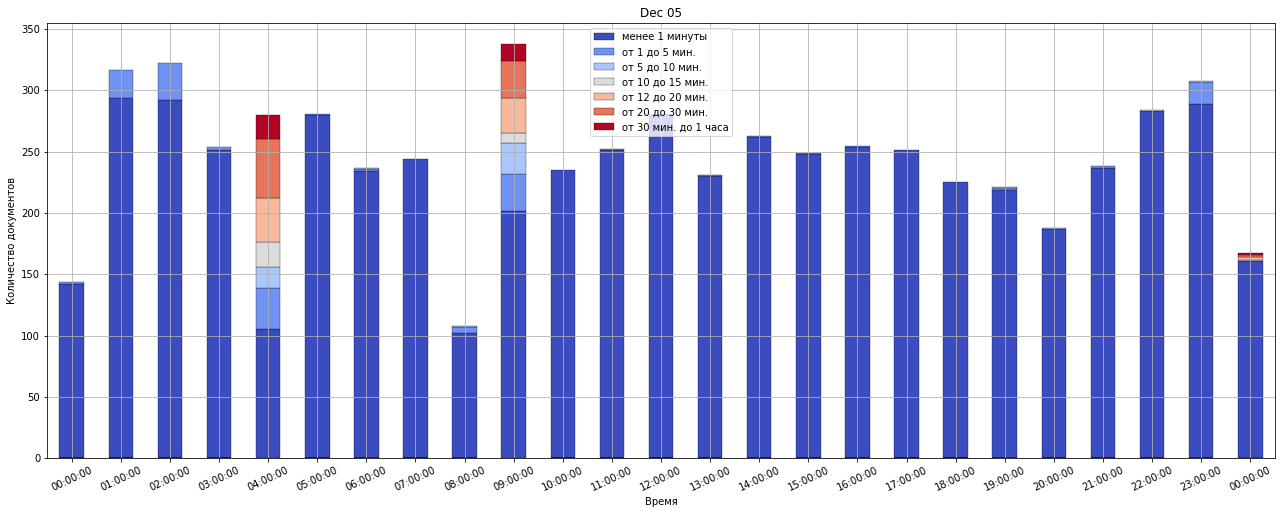

In [619]:
day_x = pd.to_datetime('2020-12-05')
temp_df = pd.pivot_table(transport[(transport['day']==day_x)], index='date_hours', columns='min_interval', values='WBId', aggfunc='count')
temp_df = temp_df[['[0, 1]', '[1, 5]', '[5, 10]', '[10, 15]', '[15, 20]', '[20, 30]', '[30, 60]']]
temp_df.columns = ['менее 1 минуты', 'от 1 до 5 мин.', 'от 5 до 10 мин.', 'от 10 до 15 мин.', 'от 12 до 20 мин.', 'от 20 до 30 мин.', 'от 30 мин. до 1 часа']

ax = temp_df.plot.bar(stacked=True, title=day_x.strftime('%b %d'), grid=True, figsize=(22, 8), rot=25, cmap='coolwarm', edgecolor='black', linewidth=0.3)
ticklabels = [item.time() for item in temp_df.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel('Количество документов')
ax.set_xlabel('Время')
plt.savefig('/run/user/1000/gvfs/smb-share:server=10.32.0.81,share=users/Magomedov-az/Documents/sync/2020-12-05.png');